# Exploração de Dados
1. Que tipo de dados você tem, majoritariamente (atributos numéricos, textuais)?
2. Qual seu objetivo com esse dataset?
3. Seu dataset é rotulado de que maneira?
4. Como é a distribuição dos dados do dataset?
5. Quais colunas/atributos você julga ser interessante manter e remover? Por quê?

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dataset.csv')

In [39]:
df.shape

(141530, 85)

In [40]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,8733.624454,229.00000,0.00000,229,229,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4914.004914,407.00000,0.00000,407,407,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4640.371230,431.00000,0.00000,431,431,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,5571.030641,359.00000,0.00000,359,359,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,6604.75239,91.942711,10887.32424,11412.46641,78158,13,10778451,18268.56102,11786.14309,81171,126,10747836,26936.93233,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [9]:
df.columns = [i.lower().strip().replace(' ', '_') for i in df.columns]

In [43]:
pd.set_option('display.max_columns', None)
df.describe()

,src_port,dst_port,protocol,flow_duration,total_fwd_packet,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,packet_length_min,packet_length_max,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes/bulk_avg,fwd_packet/bulk_avg,fwd_bulk_rate_avg,bwd_bytes/bulk_avg,bwd_packet/bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,141530.000000,141530.000000,141530.000000,1.415300e+05,141530.000000,141530.000000,1.415300e+05,1.415300e+05,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,1.414830e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05,141530.000000,141530.0,141530.0,141530.0,1.415300e+05,1.415300e+05,1.415300e+05,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,1.415300e+05,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.0,141530.0,141530.0,141530.000000,141530.000000,141530.000000,141530.000000,141530.0,141530.0,141530.0,141530.0,141530.000000,1.415300e+05,141530.000000,141530.000000,141530.0,141530.000000,141530.000000,141530.000000,141530.000000,141530.000000,141530.0,141530.0,141530.0,141530.0,1.415300e+05,1.415300e+05,1.415300e+05,1.415300e+05
mean,38450.268819,18124.647333,10.350427,2.081280e+07,152.800749,154.642062,1.126211e+05,1.304530e+05,208.920420,15.617078,69.594959,63.974203,229.971299,41.252194,107.286657,65.183434,inf,inf,2.604871e+06,3.217701e+06,9.893961e+06,9.079030e+05,1.976846e+07,4.101510e+06,2.590150e+06,9.198071e+06,2.481004e+06,1.663278e+07,3.054588e+06,2.205417e+06,7.408141e+06,1.617510e+06,0.099562,0.0,0.0,0.0,2.933009e+03,3.099272e+03,6.321814e+03,4574.665230,14.365604,323.627316,94.373958,108.474093,5.488104e+04,0.455691,0.462284,0.038571,61.523168,268.251749,0.0,0.0,0.0,0.607214,108.900008,69.594959,107.286657,0.0,0.0,0.0,0.0,158.869455,4.521801e+04,0.286745,43.128022,0.0,55.488568,5308.189670,1766.762411,96.881573,15.808182,0.0,0.0,0.0,0.0,7.028030e+14,5.526137e+13,7.305885e+14,5.994078e+14
std,19124.801990,22202.197159,5.431807,3.809155e+07,2378.323352,3418.715287,3.251357e+06,4.566180e+06,649.432333,31.312298,219.965954,168.646012,786.736861,100.785013,240.511916,193.995126,NaN,NaN,7.124917e+06,7.753864e+06,1.968518e+07,5.665210e+06,3.765663e+07,1.145549e+07,7.138834e+06,1.921286e+07,1.049675e+07,3.590770e+07,1.036402e+07,6.824438e+06,1.801633e+07,9.098340e+06,0.299416,0.0,0.0,0.0,4.752686e+04,6.995175e+04,3.558899e+04,21380.969146,23.951595,966.025271,190.563975,207.640840,7.933552e+05,0.556133,0.844423,0.342543,807.239077,5342.816116,0.0,0.0,0.0,12.497544,197.306424,219.965954,240.511916,0.0,0.0,0.0,0.0,3042.371342,1.046669e+06,0.452243,137.725733,0.0,134.367698,9895.622577,7563.995687,1582.814902,7.110714,0.0,0.0,0.0,0.0,7.058710e+14,1.930165e+14,7.248202e+14,7.138287e+14
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00

### Remoção de NaN e Inf

In [170]:
df[
    (df['flow_packets/s'] == np.inf) | (df['flow_bytes/s'] == np.inf) | (df['flow_bytes/s'] == np.nan)
].shape

(0, 85)

In [45]:
# Teste sem as linhas que tem inf e NaN
df[~(
    (df['flow_packets/s'] == np.inf) | (df['flow_bytes/s'] == np.inf) | (df['flow_bytes/s'] == np.nan)   
)].describe()

,src_port,dst_port,protocol,flow_duration,total_fwd_packet,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,packet_length_min,packet_length_max,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes/bulk_avg,fwd_packet/bulk_avg,fwd_bulk_rate_avg,bwd_bytes/bulk_avg,bwd_packet/bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,141481.000000,141481.000000,141481.000000,1.414810e+05,141481.000000,141481.000000,1.414810e+05,1.414810e+05,141481.000000,141481.000000,141481.000000,141481.000000,141481.000000,141481.000000,141481.000000,141481.000000,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05,141481.000000,141481.0,141481.0,141481.0,1.414810e+05,1.414810e+05,1.414810e+05,141481.000000,141481.00000,141481.000000,141481.000000,141481.000000,1.414810e+05,141481.000000,141481.000000,141481.000000,141481.000000,141481.000000,141481.0,141481.0,141481.0,141481.000000,141481.000000,141481.000000,141481.000000,141481.0,141481.0,141481.0,141481.0,141481.000000,1.414810e+05,141481.000000,141481.000000,141481.0,141481.000000,141481.000000,141481.000000,141481.000000,141481.000000,141481.0,141481.0,141481.0,141481.0,1.414810e+05,1.414810e+05,1.414810e+05,1.414810e+05
mean,38461.671044,18114.742651,10.351934,2.082001e+07,152.853238,154.695358,1.126601e+05,1.304982e+05,208.992183,15.622112,69.618578,63.996204,230.050947,41.266481,107.323814,65.206009,8.511509e+04,1.090025e+04,2.605773e+06,3.218815e+06,9.897388e+06,9.082174e+05,1.977531e+07,4.102931e+06,2.591047e+06,9.201257e+06,2.481863e+06,1.663854e+07,3.055646e+06,2.206181e+06,7.410707e+06,1.618070e+06,0.099582,0.0,0.0,0.0,2.934016e+03,3.100340e+03,6.324003e+03,4576.249602,14.37058,323.738806,94.406247,108.511319,5.490004e+04,0.455524,0.462444,0.038542,61.544462,268.344004,0.0,0.0,0.0,0.607163,108.937130,69.618578,107.323814,0.0,0.0,0.0,0.0,158.924477,4.523367e+04,0.286759,43.142669,0.0,55.507785,5309.368869,1766.743450,96.915126,15.806730,0.0,0.0,0.0,0.0,7.030464e+14,5.528051e+13,7.308415e+14,5.996154e+14
std,19117.036685,22198.047115,5.432144,3.809618e+07,2378.733496,3419.306053,3.251919e+06,4.566970e+06,649.533315,31.316241,220.000333,168.671059,786.861445,100.799540,240.545273,194.024924,1.253105e+06,5.140726e+04,7.125986e+06,7.754975e+06,1.968772e+07,5.666166e+06,3.766135e+07,1.145722e+07,7.139907e+06,1.921542e+07,1.049847e+07,3.591258e+07,1.036566e+07,6.825496e+06,1.801892e+07,9.099865e+06,0.299443,0.0,0.0,0.0,4.753506e+04,6.996384e+04,3.559496e+04,21384.501827,23.95425,966.173949,190.589042,207.667136,7.934920e+05,0.556139,0.844525,0.342483,807.378043,5343.738947,0.0,0.0,0.0,12.499705,197.330438,220.000333,240.545273,0.0,0.0,0.0,0.0,3042.896705,1.046850e+06,0.452250,137.747309,0.0,134.386995,9896.763688,7565.024908,1583.087946,7.111517,0.0,0.0,0.0,0.0,7.058720e+14,1.930472e+14,7.248181e+14,7.138651e+14
min,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.00000

In [46]:
df_novo = df[~(
    (df['flow_packets/s'] == np.inf) | (df['flow_bytes/s'] == np.inf) | (df['flow_bytes/s'] == np.nan)   
)]

In [47]:
df_velho = df
df = df_novo

In [119]:
sorted(df.columns)

['ack_flag_count',
 'active_max',
 'active_mean',
 'active_min',
 'active_std',
 'average_packet_size',
 'bwd_bulk_rate_avg',
 'bwd_bytes/bulk_avg',
 'bwd_header_length',
 'bwd_iat_max',
 'bwd_iat_mean',
 'bwd_iat_min',
 'bwd_iat_std',
 'bwd_iat_total',
 'bwd_init_win_bytes',
 'bwd_packet/bulk_avg',
 'bwd_packet_length_max',
 'bwd_packet_length_mean',
 'bwd_packet_length_min',
 'bwd_packet_length_std',
 'bwd_packets/s',
 'bwd_psh_flags',
 'bwd_segment_size_avg',
 'bwd_urg_flags',
 'cwe_flag_count',
 'down/up_ratio',
 'dst_ip',
 'dst_port',
 'ece_flag_count',
 'fin_flag_count',
 'flow_bytes/s',
 'flow_duration',
 'flow_iat_max',
 'flow_iat_mean',
 'flow_iat_min',
 'flow_iat_std',
 'flow_id',
 'flow_packets/s',
 'fwd_act_data_pkts',
 'fwd_bulk_rate_avg',
 'fwd_bytes/bulk_avg',
 'fwd_header_length',
 'fwd_iat_max',
 'fwd_iat_mean',
 'fwd_iat_min',
 'fwd_iat_std',
 'fwd_iat_total',
 'fwd_init_win_bytes',
 'fwd_packet/bulk_avg',
 'fwd_packet_length_max',
 'fwd_packet_length_mean',
 'fwd_pac

In [42]:
active_columns = df.columns[df.columns.str.match('^active_')]
bwd_columns = df.columns[df.columns.str.match('^bwd_')]
flow_columns = df.columns[df.columns.str.match('^flow_')]
fwd_columns = df.columns[df.columns.str.match('^fwd_')]
idle_columns = df.columns[df.columns.str.match('^idle_')]
packet_columns = df.columns[df.columns.str.match('^packet_')]
subflow_columns = df.columns[df.columns.str.match('^subflow_')]
total_columns = df.columns[df.columns.str.match('^total_')]

In [71]:
other_columns = df.columns[~df.columns.str.match('^(active|bwd|flow|fwd|idle|packet|subflow|total)_')]

### Funções Facilitadoras
Funções para facilitar plotagem de gráficos

In [116]:
def plota_boxplot(variavel, sufixo=['mean', 'std', 'min', 'max']):
    fig, axs = plt.subplots(1, len(sufixo), figsize=(24,5))
    sub_df = df.loc[:, df.columns.str.match(variavel)]
    for idx, item in enumerate(sufixo):
        label_plot = f'{variavel}_{item}'
        ax = sns.boxplot(x='label', y=label_plot, data=df, ax=axs[idx])
        ax.set_ylabel('')
        ax.set_xlabel(label_plot)
    fig.suptitle(variavel)

In [117]:
def plota_boxplot_prefixo(variavel, prefixo=['fwd']):
    fig, axs = plt.subplots(1, len(prefixo), figsize=(24,5))
    sub_df = df.loc[:, df.columns.str.match(variavel)]
    for idx, item in enumerate(prefixo):
        label_plot = f'{item}_{variavel}'
        ax = sns.boxplot(x='label', y=label_plot, data=df, ax=axs[idx])
        ax.set_ylabel('')
        ax.set_xlabel(label_plot)
    fig.suptitle(variavel)

# Bwd e Fwd

In [137]:
print(bwd_columns, len(bwd_columns))
print(fwd_columns, len(fwd_columns))

Index(['bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'bwd_iat_total',
       'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min',
       'bwd_psh_flags', 'bwd_urg_flags', 'bwd_header_length', 'bwd_packets/s',
       'bwd_segment_size_avg', 'bwd_bytes/bulk_avg', 'bwd_packet/bulk_avg',
       'bwd_bulk_rate_avg', 'bwd_init_win_bytes'],
      dtype='object') 18
Index(['fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std', 'fwd_iat_total',
       'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min',
       'fwd_psh_flags', 'fwd_urg_flags', 'fwd_header_length', 'fwd_packets/s',
       'fwd_segment_size_avg', 'fwd_bytes/bulk_avg', 'fwd_packet/bulk_avg',
       'fwd_bulk_rate_avg', 'fwd_init_win_bytes', 'fwd_act_data_pkts',
       'fwd_seg_size_min'],
      dtype='object') 20


## Mean, std, min, max e outro

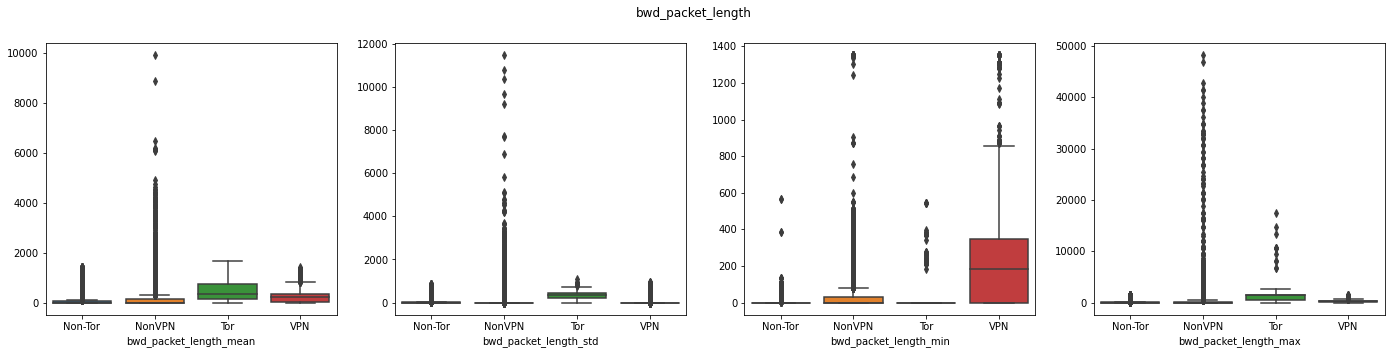

In [134]:
plota_boxplot('bwd_packet_length')

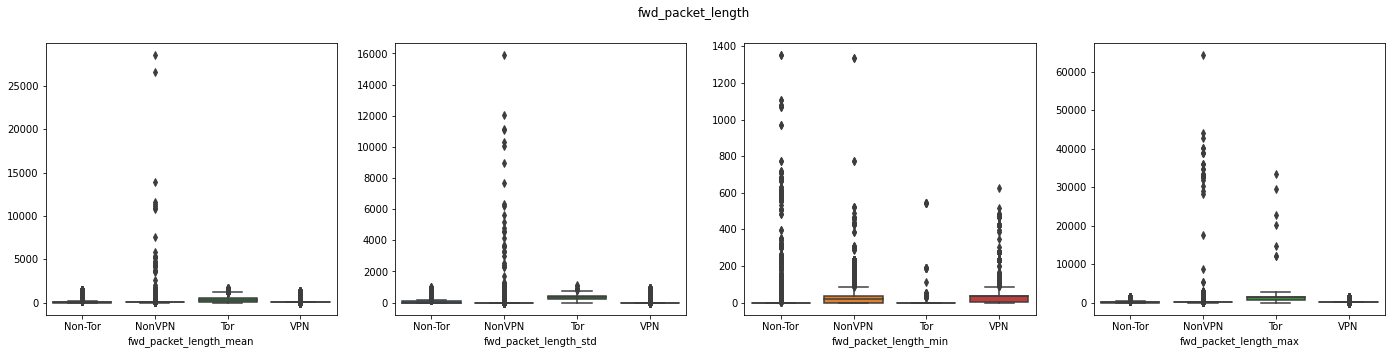

In [138]:
plota_boxplot('fwd_packet_length')

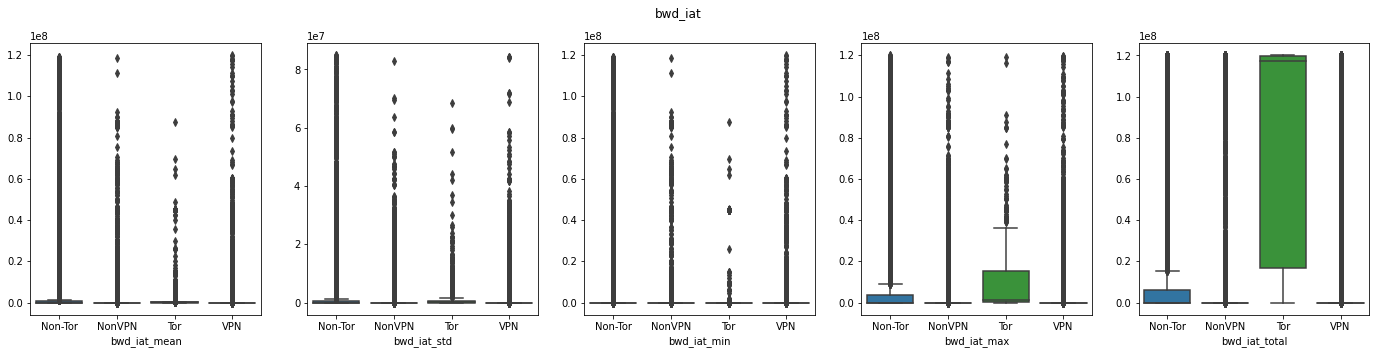

In [135]:
plota_boxplot('bwd_iat', ['mean', 'std', 'min', 'max', 'total'])

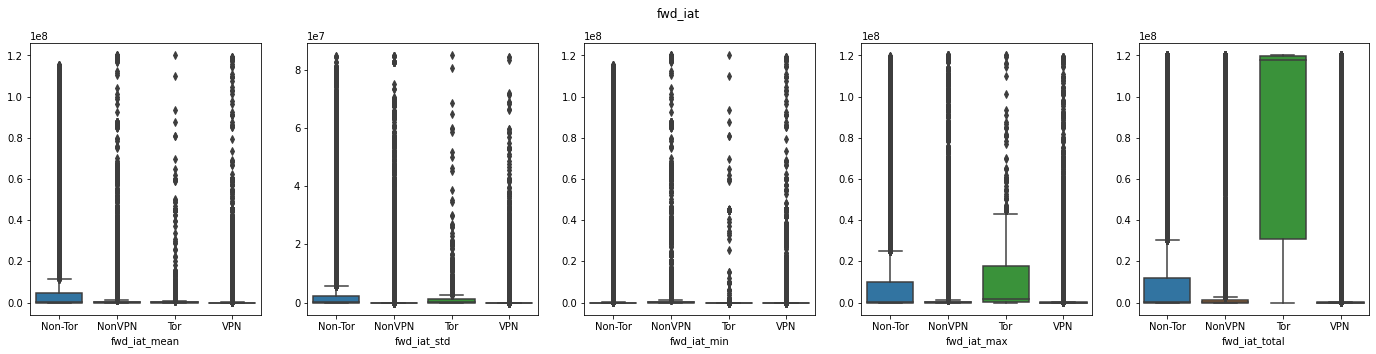

In [139]:
plota_boxplot('fwd_iat', ['mean', 'std', 'min', 'max', 'total'])

## Variável com bwd vs fwd

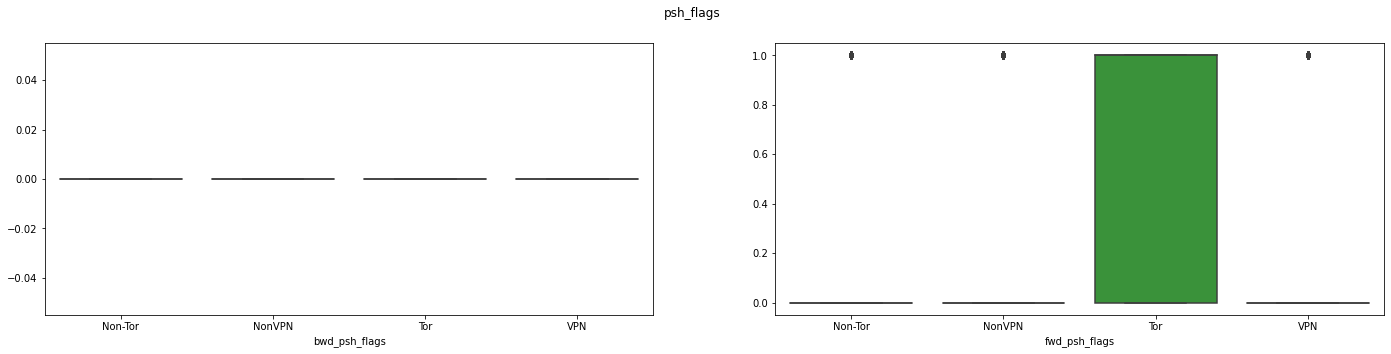

In [140]:
plota_boxplot_prefixo('psh_flags', ['bwd', 'fwd'])

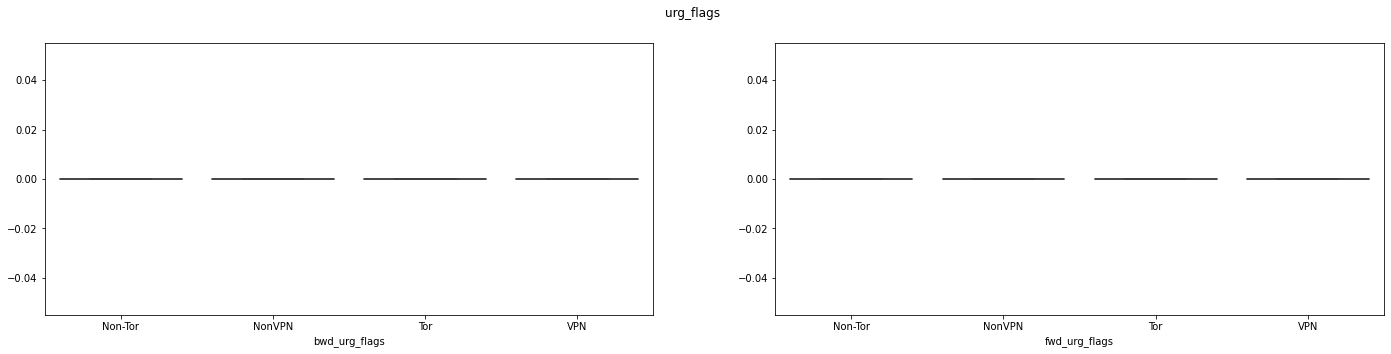

In [141]:
plota_boxplot_prefixo('urg_flags', ['bwd', 'fwd'])

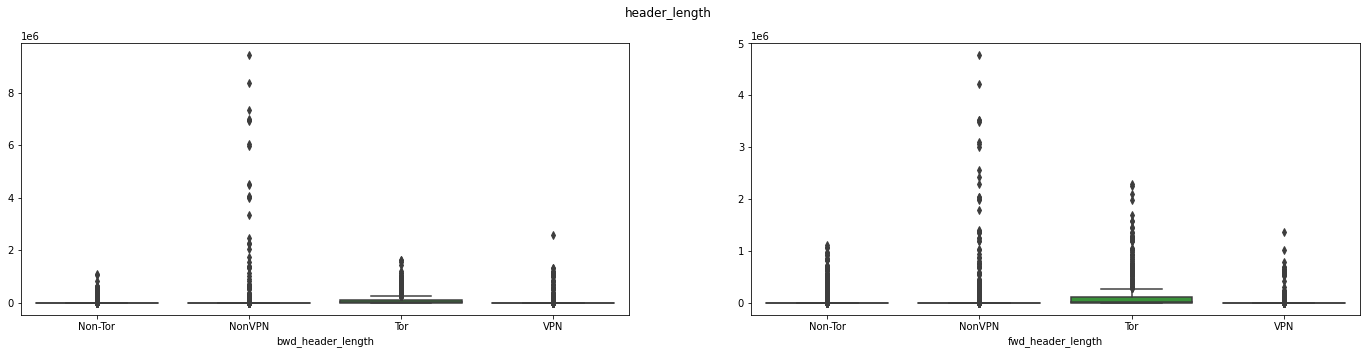

In [142]:
plota_boxplot_prefixo('header_length', ['bwd', 'fwd'])

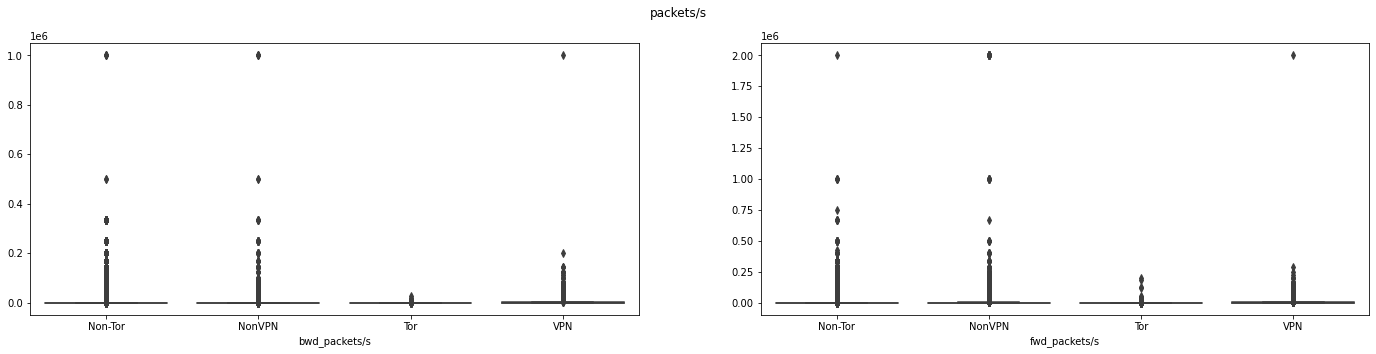

In [143]:
plota_boxplot_prefixo('packets/s', ['bwd', 'fwd'])

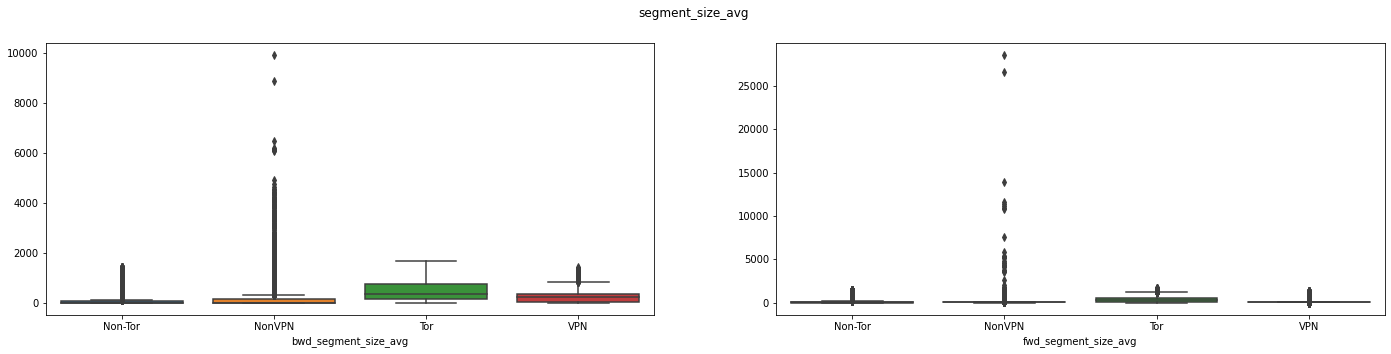

In [144]:
plota_boxplot_prefixo('segment_size_avg', ['bwd', 'fwd'])

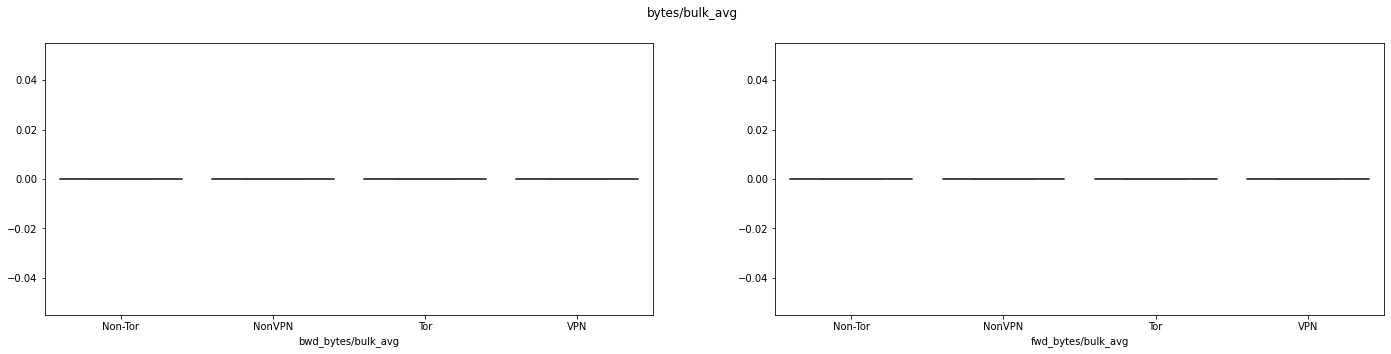

In [145]:
plota_boxplot_prefixo('bytes/bulk_avg', ['bwd', 'fwd'])

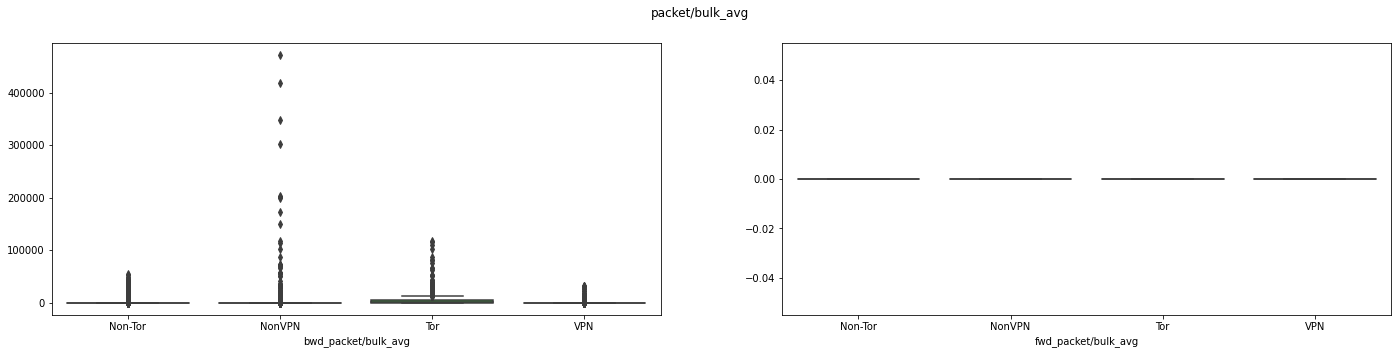

In [146]:
plota_boxplot_prefixo('packet/bulk_avg', ['bwd', 'fwd'])

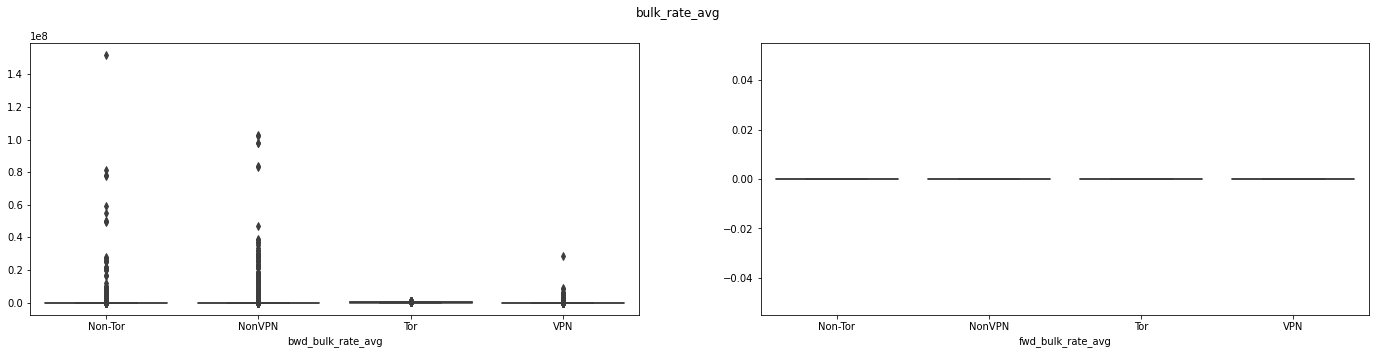

In [147]:
plota_boxplot_prefixo('bulk_rate_avg', ['bwd', 'fwd'])

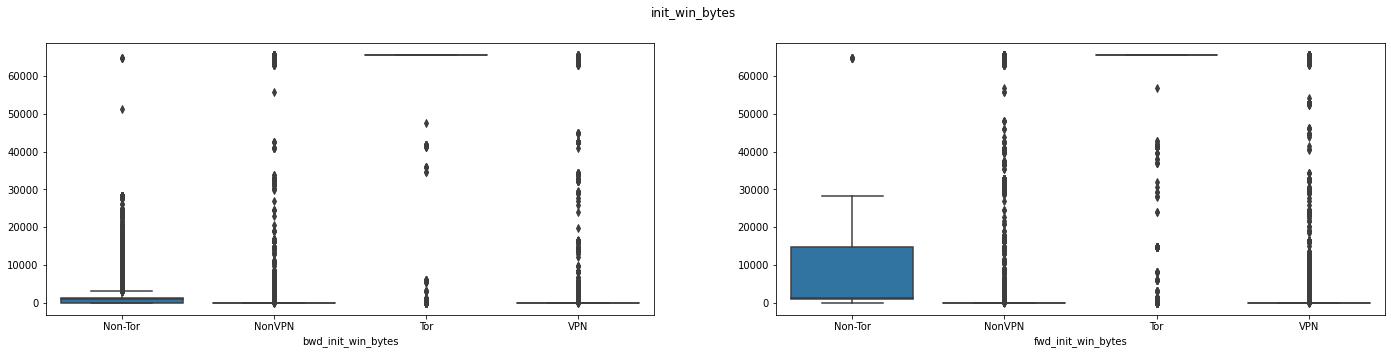

In [148]:
plota_boxplot_prefixo('init_win_bytes', ['bwd', 'fwd'])

## Só Fwd

<AxesSubplot:xlabel='label', ylabel='fwd_act_data_pkts'>

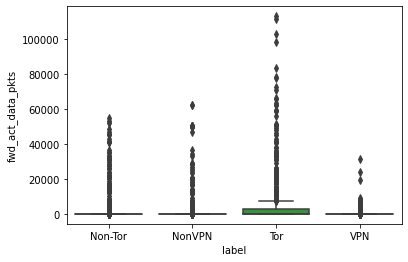

In [149]:
sns.boxplot(x='label', y='fwd_act_data_pkts', data=df)

<AxesSubplot:xlabel='label', ylabel='fwd_seg_size_min'>

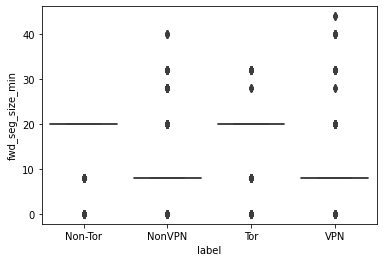

In [150]:
sns.boxplot(x='label', y='fwd_seg_size_min', data=df)

# Active, Idle e Packet

In [126]:
print(active_columns)
print(idle_columns)
print(packet_columns)

Index(['active_mean', 'active_std', 'active_max', 'active_min'], dtype='object')
Index(['idle_mean', 'idle_std', 'idle_max', 'idle_min'], dtype='object')
Index(['packet_length_min', 'packet_length_max', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance'],
      dtype='object')


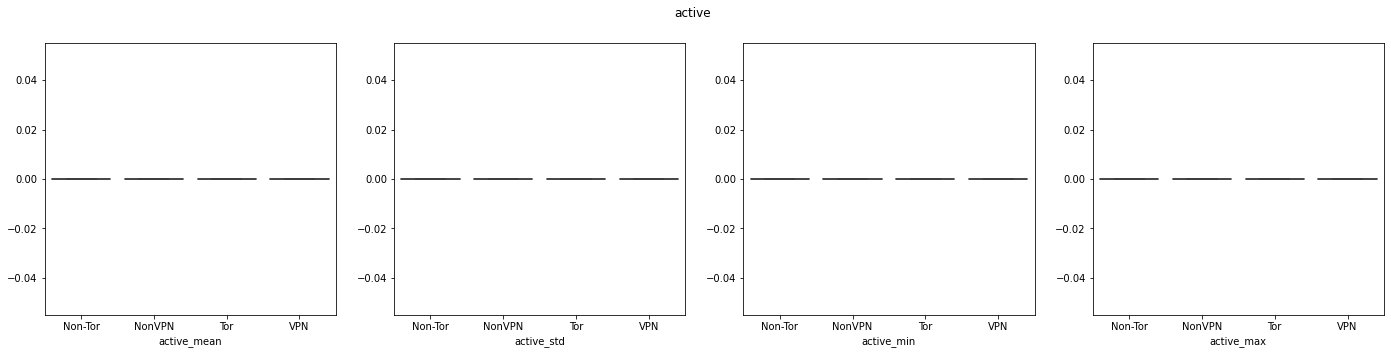

In [121]:
plota_boxplot('active')

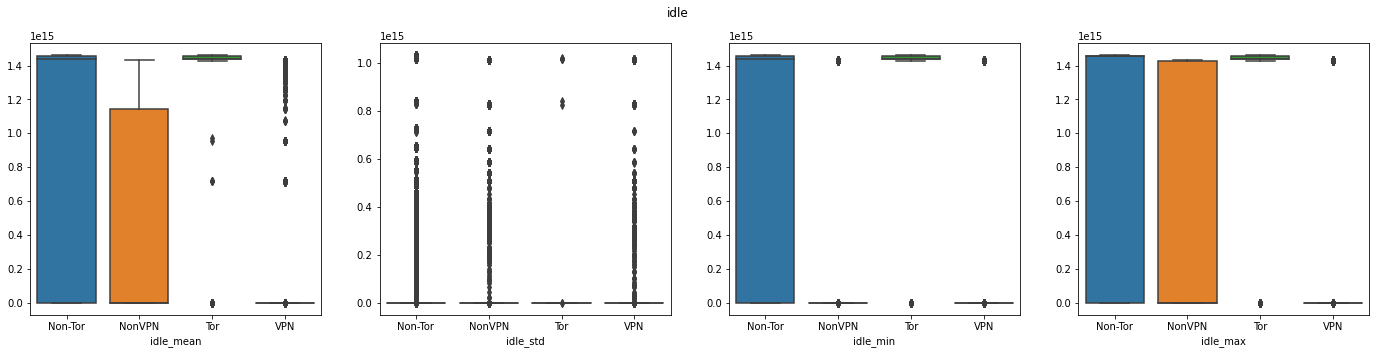

In [123]:
plota_boxplot('idle')

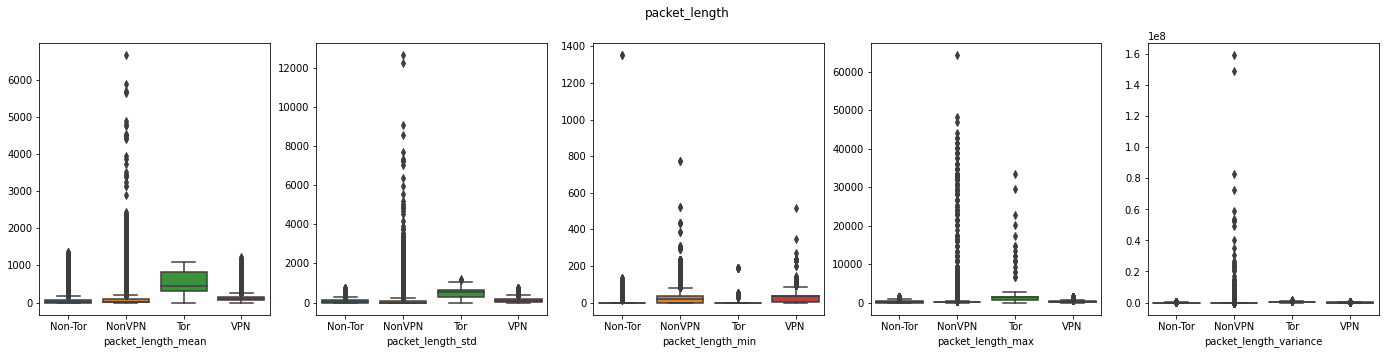

In [125]:
plota_boxplot('packet_length', ['mean', 'std', 'min', 'max', 'variance'])

# Flow

In [153]:
print(flow_columns)

Index(['flow_id', 'flow_duration', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min'],
      dtype='object')


In [160]:
df['flow_id'].value_counts()

8.6.0.1-8.0.6.4-0-0-0                          430
10.152.152.11-239.255.255.250-34803-1900-17    172
195.154.107.23-10.0.2.15-443-37652-6           108
10.0.2.15-195.154.107.23-54453-443-6           104
10.8.8.138-255.255.255.255-17500-17500-17       88
                                              ... 
10.152.152.11-64.233.164.120-35978-443-17        1
10.152.152.11-10.152.152.10-52076-53-17          1
10.152.152.11-10.152.152.10-24368-53-17          1
10.152.152.11-10.152.152.10-37374-53-17          1
10.8.8.246-224.0.0.252-61115-5355-17             1
Name: flow_id, Length: 77522, dtype: int64

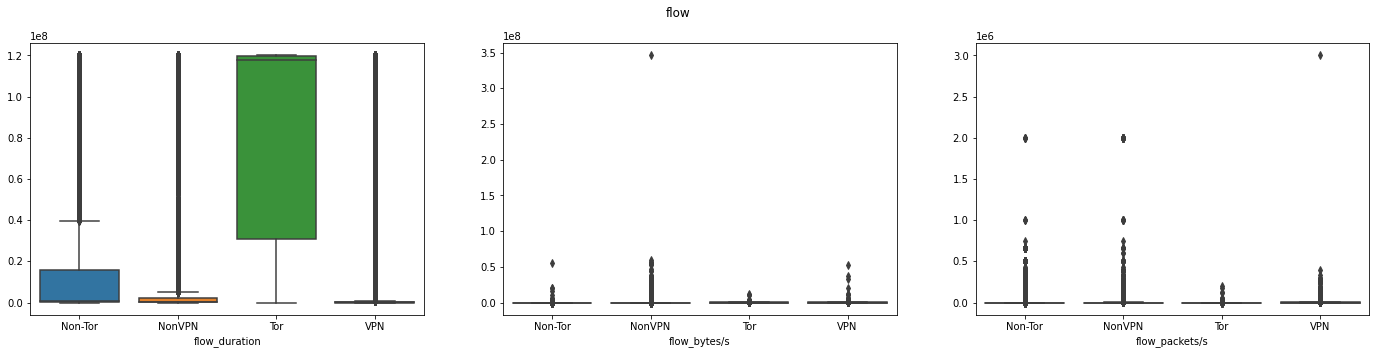

In [161]:
plota_boxplot('flow', ['duration', 'bytes/s', 'packets/s'])

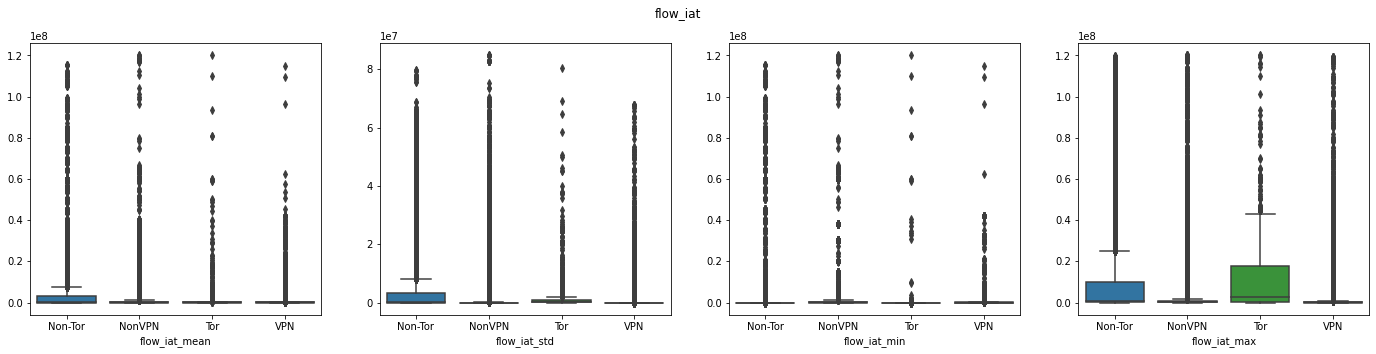

In [163]:
plota_boxplot('flow_iat')

# Subflow

In [154]:
print(subflow_columns)

Index(['subflow_fwd_packets', 'subflow_fwd_bytes', 'subflow_bwd_packets',
       'subflow_bwd_bytes'],
      dtype='object')


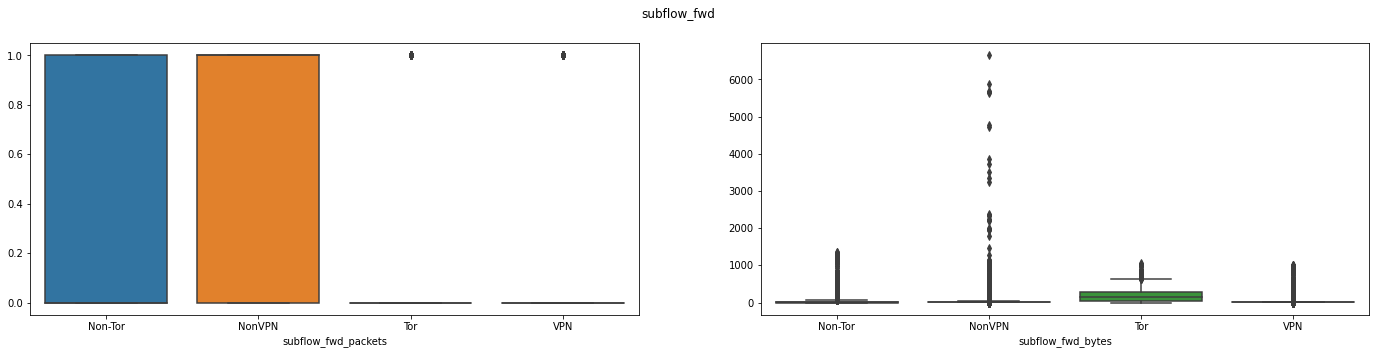

In [155]:
plota_boxplot('subflow_fwd', ['packets', 'bytes'])

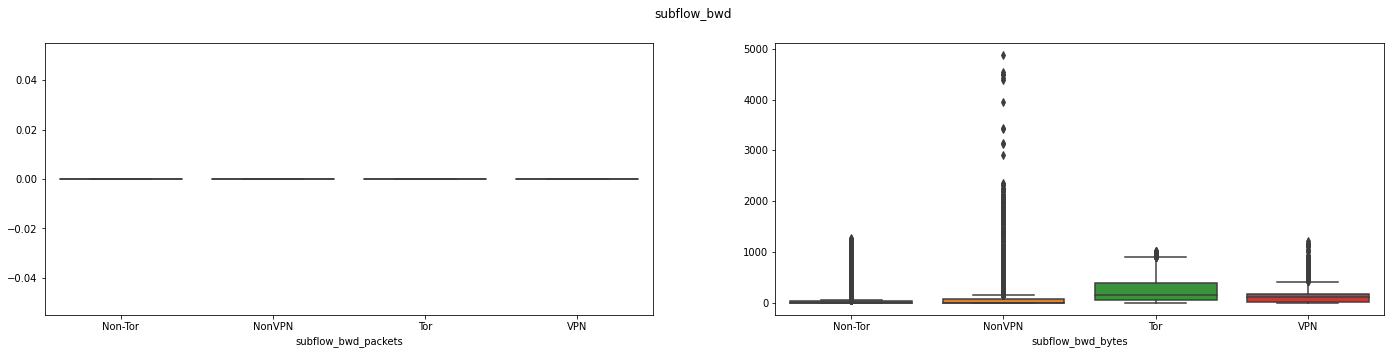

In [156]:
plota_boxplot('subflow_bwd', ['packets', 'bytes'])

# Total

In [128]:
print(total_columns)

Index(['total_fwd_packet', 'total_bwd_packets', 'total_length_of_fwd_packet',
       'total_length_of_bwd_packet'],
      dtype='object')


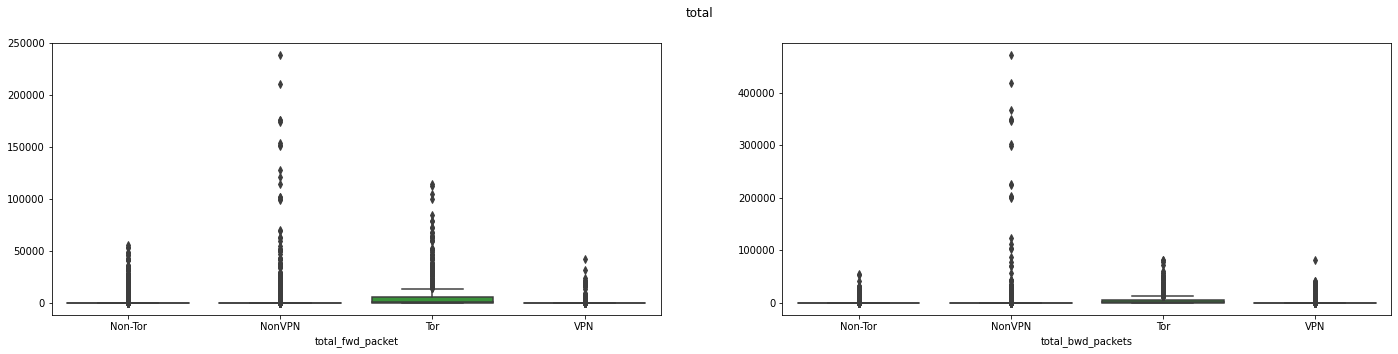

In [131]:
plota_boxplot('total', ['fwd_packet', 'bwd_packets'])

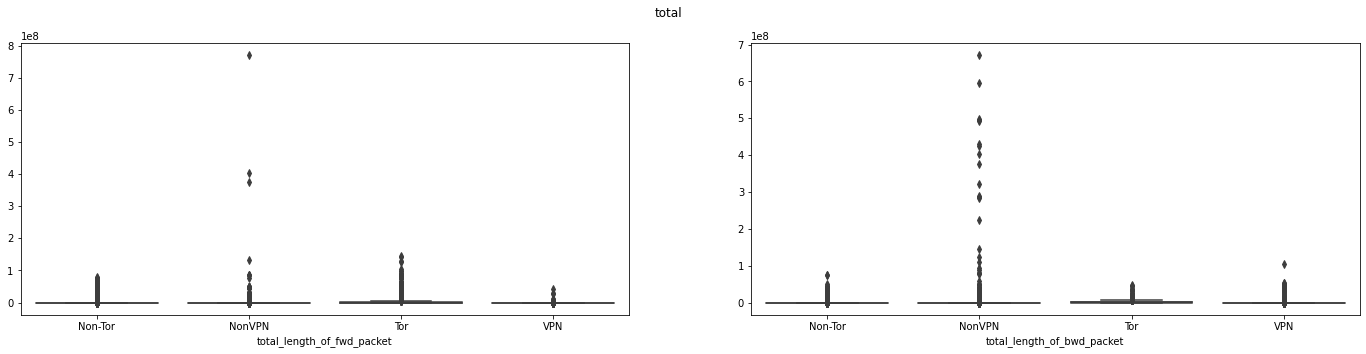

In [132]:
plota_boxplot('total', ['length_of_fwd_packet', 'length_of_bwd_packet'])

# Other Columns

In [127]:
print(other_columns)

Index(['src_ip', 'src_port', 'dst_ip', 'dst_port', 'protocol', 'timestamp',
       'fin_flag_count', 'syn_flag_count', 'rst_flag_count', 'psh_flag_count',
       'ack_flag_count', 'urg_flag_count', 'cwe_flag_count', 'ece_flag_count',
       'down/up_ratio', 'average_packet_size', 'label', 'label.1'],
      dtype='object')


## Source and Destination IP

In [51]:
ips_nao_publicos = [
    '^10\.', '^172\.1[6-9]\.', '^172\.2[0-9]\.', '^172\.3[0-1]\.', '^192\.168\.'
]
regex_ips = '|'.join(ips_nao_publicos)

In [52]:
src_ip = df['src_ip']
dst_ip = df['dst_ip']

In [53]:
print('IPs origem não públicos: ', end='')
print(src_ip.str.match(regex_ips).sum(), 'de', df.shape[0])
df.loc[src_ip.str.match(regex_ips), 'label'].value_counts()

IPs origem não públicos: 104685 de 141481


Non-Tor    81633
VPN        21468
Tor          812
NonVPN       772
Name: label, dtype: int64

In [54]:
print('IPs destino não públicos: ', end='')
print(dst_ip.str.match(regex_ips).sum(), 'de', df.shape[0])
df.loc[dst_ip.str.match(regex_ips), 'label'].value_counts()

IPs destino não públicos: 25881 de 141481


Non-Tor    23747
VPN         1609
Tor          370
NonVPN       155
Name: label, dtype: int64

## Source and Destination Ports

In [55]:
src_port = df['src_port']
dst_port = df['dst_port']

In [56]:
print(src_port[src_port < 1024].value_counts().sum(), "portas origem no intervalo [0, 1024)")
df.loc[src_port < 1024, 'label'].value_counts()

11634 portas origem no intervalo [0, 1024)


Non-Tor    7698
NonVPN     2479
VPN        1052
Tor         405
Name: label, dtype: int64

<AxesSubplot:>

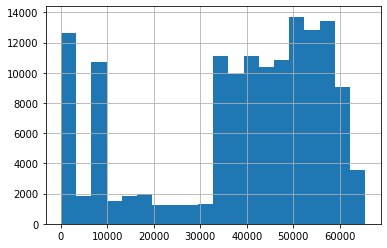

In [57]:
src_port.hist(bins=20)

In [58]:
print(dst_port[dst_port < 1024].value_counts().sum(), "portas destino no intervalo [0, 1024)")
df.loc[dst_port < 1024, 'label'].value_counts()

62845 portas destino no intervalo [0, 1024)


Non-Tor    34235
VPN        17513
NonVPN     10180
Tor          917
Name: label, dtype: int64

<AxesSubplot:>

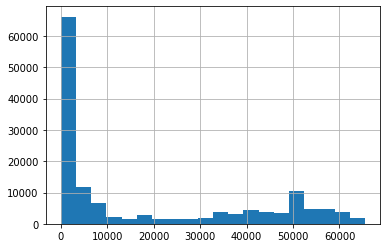

In [59]:
dst_port.hist(bins=20)

## Protocol

In [60]:
df['protocol'].value_counts()

6     84272
17    56410
0       799
Name: protocol, dtype: int64

In [61]:
df[df['protocol'] == 17].loc[:, 'label'].value_counts()

Non-Tor    21516
NonVPN     17630
VPN        17199
Tor           65
Name: label, dtype: int64

In [62]:
df[df['protocol'] == 6].loc[:, 'label'].value_counts()

Non-Tor    71713
VPN         5664
NonVPN      5603
Tor         1292
Name: label, dtype: int64

In [63]:
df[df['protocol'] == 0].loc[:, 'label'].value_counts()

NonVPN     628
Non-Tor     80
VPN         56
Tor         35
Name: label, dtype: int64

## Timestamp

In [69]:
df['timestamp']

0         24/07/2015 04:09:48 PM
1         24/07/2015 04:09:48 PM
2         24/07/2015 04:09:48 PM
3         24/07/2015 04:09:48 PM
4         24/07/2015 04:09:45 PM
                   ...          
141525    22/05/2015 01:55:03 PM
141526    22/05/2015 02:09:05 PM
141527    22/05/2015 02:19:31 PM
141528    22/05/2015 02:29:55 PM
141529    22/05/2015 02:31:23 PM
Name: timestamp, Length: 141481, dtype: object

## Flag Count

In [114]:
flag_count_df = df.loc[:, other_columns[other_columns.str.endswith('_flag_count')]]

In [115]:
for column in flag_count_df.columns:
    print(flag_count_df[column].value_counts())
    print('-------')

0    81367
1    55780
2     4334
Name: fin_flag_count, dtype: int64
-------
0    108809
2     32580
3        80
1         9
7         2
4         1
Name: syn_flag_count, dtype: int64
-------
0     138197
1       1888
2        832
3        504
4         34
6         10
5          4
10         3
8          3
7          2
9          2
16         1
71         1
Name: rst_flag_count, dtype: int64
-------
0       94540
1       11161
2        7083
4        3114
3        3060
        ...  
5174        1
5598        1
5464        1
4786        1
331         1
Name: psh_flag_count, Length: 1605, dtype: int64
-------
0        58336
2        27787
3         8290
5         5706
4         5393
         ...  
7736         1
548          1
7900         1
7120         1
37615        1
Name: ack_flag_count, Length: 2489, dtype: int64
-------
0    141481
Name: urg_flag_count, dtype: int64
-------
0    141481
Name: cwe_flag_count, dtype: int64
-------
0    141481
Name: ece_flag_count, dtype: int64
-------

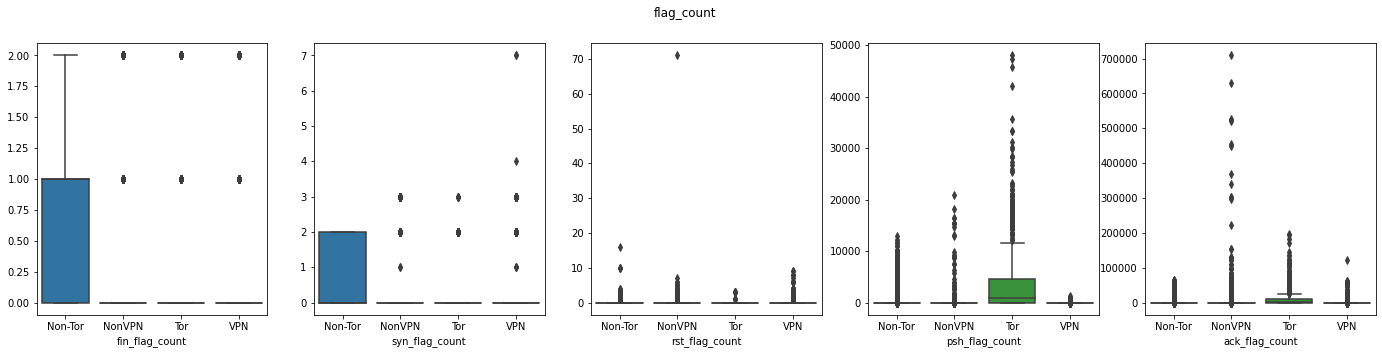

In [167]:
plota_boxplot_prefixo('flag_count', ['fin', 'syn', 'rst', 'psh', 'ack'])

## Down/up Ratio

<AxesSubplot:xlabel='label', ylabel='down/up_ratio'>

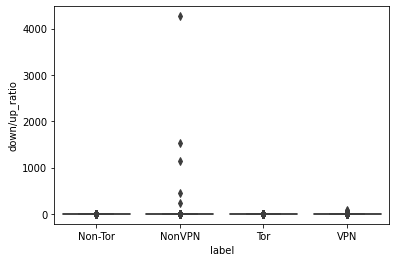

In [99]:
sns.boxplot(x='label', y='down/up_ratio', data=df)

## Average Packet Size

<AxesSubplot:xlabel='label', ylabel='average_packet_size'>

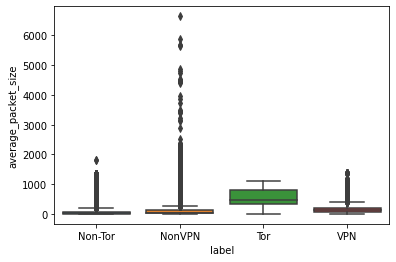

In [100]:
sns.boxplot(x='label', y='average_packet_size', data=df)

## Labels

In [101]:
df['label'].value_counts()

Non-Tor    93309
NonVPN     23861
VPN        22919
Tor         1392
Name: label, dtype: int64

In [102]:
df['label.1'].value_counts()

P2P                48520
Browsing           32808
Audio-Streaming    16580
Chat               11473
File-Transfer      11089
Video-Streaming     9467
Email               6143
VOIP                3566
AUDIO-STREAMING     1470
Video-streaming      281
File-transfer         84
Name: label.1, dtype: int64

# Respostas das perguntas

### 1. Que tipo de dados você tem, majoritariamente (atributos numéricos, textuais)?
Numéricos

In [164]:
df.dtypes.value_counts()

int64      55
float64    24
object      6
dtype: int64

In [8]:
df.select_dtypes(include = 'object').columns

Index(['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label', 'Label.1'], dtype='object')

### 2. Qual seu objetivo com esse dataset?
A partir de amostras de fluxos de uma rede,
conseguir classificar esse fluxo como Tor, Não-Tor, VPN ou Não-VPN

### 3. Seu dataset é rotulado de que maneira?

In [165]:
print(', '.join(df['label'].unique()))

Non-Tor, NonVPN, Tor, VPN


### 4. Como é a distribuição dos dados do dataset?

In [166]:
print(pd.DataFrame({
    'frequência': df['label'].value_counts(), 
    'porcentagem': df['label'].value_counts(normalize=True)
}))

         frequência  porcentagem
Non-Tor       93309     0.659516
NonVPN        23861     0.168652
VPN           22919     0.161993
Tor            1392     0.009839


### 5. Quais colunas/atributos você julga ser interessante manter e remover? Por quê?

Para escolher quais colunas manter, foram analisados se os dados são numéricos. Se sim, estes foram plotados para ver quais influenciam na classificação do fluxo.

Então, até o momento, as colunas a serem mantidas são:


E as colunas a serem retiradas são

- **Mantém**

        'bwd_packet_length_mean', 'bwd_packet_length_std',
        'bwd_packet_length_min', 'bwd_packet_length_max',
        'fwd_packet_length_mean', 'fwd_packet_length_std',
        'fwd_packet_length_min', 'fwd_packet_length_max',
        'bwd_iat_max', 'bwd_iat_total',
        'fwd_iat_mean', 'fwd_iat_std',
        'fwd_iat_max', 'fwd_iat_total',
        'fwd_psh_flags', 'bwd_header_length',
        'fwd_header_length', 'bwd_segment_size_avg',
        'fwd_segment_size_avg', 'bwd_packet/bulk_avg',
        'bwd_init_win_bytes', 'fwd_init_win_bytes',
        'fwd_act_data_pkts', 'idle_mean',
        'idle_min', 'idle_max',
        'packet_length_mean', 'packet_length_std',
        'packet_length_min', 'packet_length_max',
        'flow_duration', 'flow_iat_mean',
        'flow_iat_std', 'flow_iat_max',
        'subflow_fwd_packets', 'subflow_fwd_bytes',
        'subflow_bwd_bytes', 'total_fwd_packet',
        'total_bwd_packets', 'protocol',
        'fin_flag_count', 'syn_flag_count',
        'psh_flag_count', 'ack_flag_count',
        'average_packet_size', 'label'

- **Retira**

        'bwd_iat_mean', 'bwd_iat_std',
        'bwd_iat_min', 'fwd_iat_min',
        'bwd_psh_flags', 'bwd_urg_flags',
        'fwd_urg_flags', 'bwd_packets/s',
        'fwd_packets/s', 'bwd_bytes/bulk_avg',
        'fwd_bytes/bulk_avg', 'fwd_packet/bulk_avg',
        'bwd_bulk_rate_avg', 'fwd_bulk_rate_avg',
        'fwd_seg_size_min', 'active_mean',
        'active_std', 'active_min',
        'active_max', 'idle_std',
        'packet_length_variance', 'flow_id',
        'flow_bytes/s', 'flow_packets/s',
        'flow_iat_min', 'subflow_bwd_packets',
        'total_length_of_fwd_packet', 'total_length_of_bwd_packet',
        'src_ip', 'src_port',
        'dst_ip', 'dst_port',
        'timestamp', 'rst_flag_count',
        'urg_flag_count', 'cwe_flag_count',
        'ece_flag_count', 'down/up_ratio',
        'label.1'

Então, até o momento, as colunas a serem mantidas são:

In [11]:
mantem = [
    'bwd_packet_length_mean',
    'bwd_packet_length_std',
    'bwd_packet_length_min',
    'bwd_packet_length_max',
    'fwd_packet_length_mean',
    'fwd_packet_length_std',
    'fwd_packet_length_min',
    'fwd_packet_length_max',
    'bwd_iat_max',
    'bwd_iat_total',
    'fwd_iat_mean',
    'fwd_iat_std',
    'fwd_iat_max',
    'fwd_iat_total',
    'fwd_psh_flags',
    'bwd_header_length',
    'fwd_header_length',
    'bwd_segment_size_avg',
    'fwd_segment_size_avg',
    'bwd_packet/bulk_avg',
    'bwd_init_win_bytes',
    'fwd_init_win_bytes',
    'fwd_act_data_pkts',
    'idle_mean',
    'idle_min',
    'idle_max',
    'packet_length_mean',
    'packet_length_std',
    'packet_length_min',
    'packet_length_max',
    'flow_duration',
    'flow_iat_mean',
    'flow_iat_std',
    'flow_iat_max',
    'subflow_fwd_packets',
    'subflow_fwd_bytes',
    'subflow_bwd_bytes',
    'total_fwd_packet',
    'total_bwd_packets',
    'protocol',
    'fin_flag_count',
    'syn_flag_count',
    'psh_flag_count',
    'ack_flag_count',
    'average_packet_size',
    'label'
]

In [12]:
len(mantem)

46

E as colunas a serem retiradas são:

In [3]:
retira = [
    'bwd_iat_mean',
    'bwd_iat_std',
    'bwd_iat_min',
    'fwd_iat_min',
    'bwd_psh_flags',
    'bwd_urg_flags',
    'fwd_urg_flags',
    'bwd_packets/s',
    'fwd_packets/s',
    'bwd_bytes/bulk_avg',
    'fwd_bytes/bulk_avg',
    'fwd_packet/bulk_avg',
    'bwd_bulk_rate_avg',
    'fwd_bulk_rate_avg',
    'fwd_seg_size_min',
    'active_mean',
    'active_std',
    'active_min',
    'active_max',
    'idle_std',
    'packet_length_variance',
    'flow_id',
    'flow_bytes/s',
    'flow_packets/s',
    'flow_iat_min',
    'subflow_bwd_packets',
    'total_length_of_fwd_packet',
    'total_length_of_bwd_packet',
    'src_ip',
    'src_port',
    'dst_ip',
    'dst_port',
    'timestamp',
    'rst_flag_count',
    'urg_flag_count',
    'cwe_flag_count',
    'ece_flag_count',
    'down/up_ratio',
    'label.1'
]

In [4]:
len(retira)

39

In [1]:
set(df.columns) - set(mantem) - set(retira)

NameError: name 'df' is not defined